In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from jeeves.cross_validation import report_stratifiedKfold_cv
%matplotlib inline

/Users/jaidevd/src/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


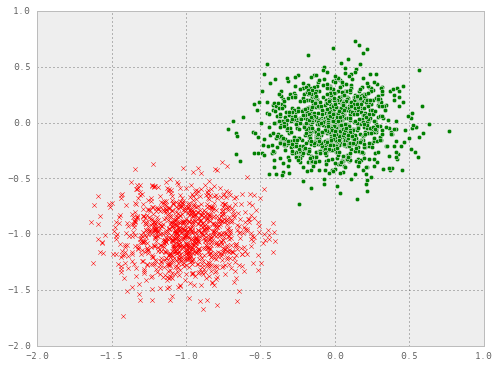

In [2]:
# make some data
x1 = np.random.multivariate_normal([0, 0], [[0.05, 0], [0, 0.05]], size=(1000,))
x2 = np.random.multivariate_normal([-1, -1], [[0.05, 0], [0, 0.05]], size=(1000,))
plt.figure(figsize=(8, 6))
plt.scatter(x1[:, 0], x1[:, 1], marker="o", c="g")
plt.scatter(x2[:, 0], x2[:, 1], marker="x", c="r")

In [3]:
# adding labels and normalizing data
x1 = np.c_[x1, np.ones((1000, 1))]
x2 = np.c_[x2, np.zeros((1000, 1))]
X = np.r_[x1, x2]
X = StandardScaler().fit_transform(X)
np.random.shuffle(X)
y = X[:, -1]
X = X[:, :-1]
y[y != 1] = 0

In [4]:
def draw_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

## Gaussian NB and decision boundaries

In [5]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB(priors=None)

In [6]:
gnb.theta_

array([[-0.90828696, -0.9098684 ],
       [ 0.90828696,  0.9098684 ]])

In [7]:
gnb.sigma_

array([[ 0.17699712,  0.17279647],
       [ 0.1730325 ,  0.17148253]])

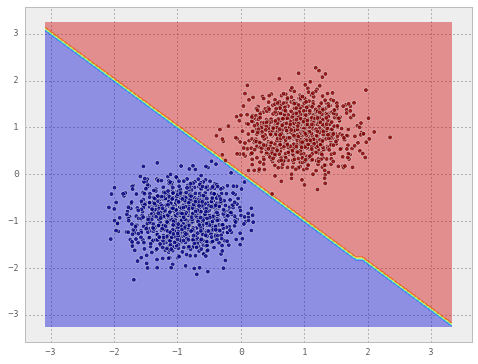

In [8]:
draw_decision_boundary(gnb, X, y)

## Perceptron and decision boundaries

In [9]:
perc = Perceptron(class_weight="balanced")
perc.fit(X, y)

Perceptron(alpha=0.0001, class_weight='balanced', eta0=1.0,
      fit_intercept=True, n_iter=5, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, verbose=0, warm_start=False)

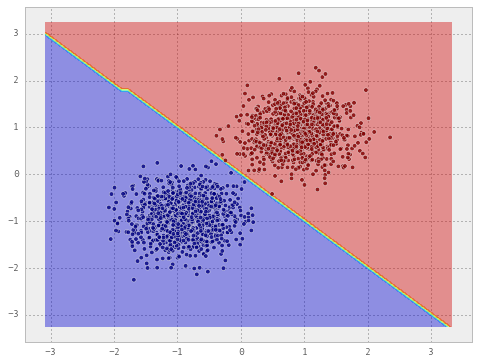

In [20]:
draw_decision_boundary(perc, X, y)

## Estimation and comparison

In [11]:
C = np.cov(X.T)
mu1 = X[y == 1, :].mean(0)
mu2 = X[y == 0, :].mean(0)

In [12]:
weights = np.dot(np.linalg.inv(C), mu1 - mu2).reshape(-1, 1)

In [13]:
weights

array([[ 0.98043582],
       [ 0.99965552]])

In [14]:
cin = np.linalg.inv(C)

In [15]:
np.dot(np.dot(mu2.reshape(1, -1), cin).ravel(), mu2) - \
np.dot(np.dot(mu1.reshape(1, -1), cin).ravel(), mu1)

1.3322676295501878e-15

## Setting the Perceptron's parameters to the estimated ones

In [19]:
perc.coef_ = weights.T

In [18]:
perc.intercept_ = np.dot(np.dot(mu2.reshape(1, -1), cin).ravel(), mu2) - \
np.dot(np.dot(mu1.reshape(1, -1), cin).ravel(), mu1)